In [1]:
import numpy as np
import damask

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())
damask3_template_path = "damask3/damask3_template"

The current directory is: 
c:\Users\nguye\Desktop\Crystal-Plasticity-COE-Journal\damask3
Moving up to the parent directory
c:\Users\nguye\Desktop\Crystal-Plasticity-COE-Journal


In [22]:
import damask
result = damask.Result('damask3/RVE_1_40_D_tensionX.hdf5')

# https://damask.mpie.de/documentation/examples/add_field_data.html
# add deformation gradient rate F and Piola–Kirchhoff stress P

result.add_stress_Cauchy(P='P',F='F')
result.add_strain(F='F',t='V')
result.add_strain("F_p")
# Add the Mises equivalent of the Cauchy stress 'sigma'
# Add the Mises equivalent of the spatial logarithmic strain 'epsilon_V^0.0(F)'
result.add_equivalent_Mises('epsilon_V^0.0(F)')
result.add_equivalent_Mises('sigma')



result.add_calculation('np.sum(#rho_mob#,axis=1)','rho_mob_total',
                    '1/m²','total mobile dislocation density')
result.add_calculation('np.sum(#rho_dip#,axis=1)','rho_dip_total',
                    '1/m²','total dislocation dipole density')
# result.add_calculation('#rho_dip_total#+#rho_mob_total','rho_total',
#                     '1/m²','total dislocation density')

# r.export_VTK()
r_last = result.view(increments=-1)


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


In [47]:
# allData: dict {increments (keys) -> {phase, geometry}
# phase -> F, O, P, sigma
# geometry -> u_n, u_p
# allData= result.get()
# print(allData["increment_0"].keys())
# print(len(allData["increment_0"]['phase']['F']))
# 64000 = 40^3
result.get("sigma")["increment_140"]

#result.add_strain(t="V")

result

 ██████████████████████████████████████████████████ 100% ETA 0:00:00


Created by /projappl/project_2004956/damask3/grid_solver/bin/DAMASK_grid v3.0.0-alpha6
        on 2023-02-13 22:23:05+0200
 executing "/projappl/project_2004956/damask3/grid_solver/bin/DAMASK_grid --load tensionX.yaml --geom RVE_1_40_D.vti"

increment_0 (0.0 s)
  phase
    Aluminum
      mechanical
        F / 1: deformation gradient
        F_e / 1: elastic deformation gradient
        F_p / 1: plastic deformation gradient
        L_p / 1/s: plastic velocity gradient
        O / q_0 (q_1 q_2 q_3): crystal orientation as quaternion
        P / Pa: first Piola-Kirchhoff stress
        epsilon_V^0.0(F) / 1: strain tensor of F (deformation gradient)
        epsilon_V^0.0(F)_vM / 1: Mises equivalent strain of epsilon_V^0.0(F) (strain tensor of F (deformation gradient))
        epsilon_V^0.0(F_p) / 1: strain tensor of F_p (plastic deformation gradient)
        rho_dip / 1/m²: dislocation dipole density
        rho_dip_total / 1/m²: total dislocation dipole density (formula: np.sum(#rho_dip#

 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


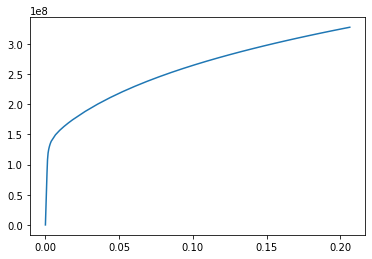

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#result.view(increments=0)#.get()
#print(result)
sigma = [np.average(s) for s in result.get('sigma_vM').values()]
## epsilon = [np.average(e) for e in result.get('epsilon_V^-1(F_p)').values()]
epsilon = [np.average(e) for e in result.get('epsilon_V^0.0(F)_vM').values()]
#print(epsilon)
plt.plot(epsilon, sigma)


In [46]:
#print(allData.keys())


sigma = list(result.get('epsilon_V^0.0(F_p)').values())[0]
print(len(sigma))
print(sigma)

 ██████████████████████████████████████████████████ 100% ETA 0:00:00


64000
[[[-1.03057946e-16 -1.37218357e-17 -1.37982185e-17]
  [-1.37218357e-17  2.42577184e-17 -8.72475607e-17]
  [-1.37982185e-17 -8.72475607e-17  2.32890767e-17]]

 [[-1.03057946e-16 -1.37218357e-17 -1.37982185e-17]
  [-1.37218357e-17  2.42577184e-17 -8.72475607e-17]
  [-1.37982185e-17 -8.72475607e-17  2.32890767e-17]]

 [[-2.22044605e-16  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -2.37851005e-16  5.32132093e-17]
  [ 0.00000000e+00  5.32132093e-17 -2.06238205e-16]]

 ...

 [[ 1.11022302e-16  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -2.58038033e-16  2.19107918e-16]
  [ 0.00000000e+00  2.19107918e-16 -1.86051177e-16]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -3.82980573e-16 -3.48074664e-17]
  [ 0.00000000e+00 -3.48074664e-17 -1.72130940e-16]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -3.82980573e-16 -3.48074664e-17]
  [ 0.00000000e+00 -3.48074664e-17 -1.72130940e-16]]]


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


[1.20000000e+13 1.20000000e+13 1.20000010e+13 1.20015514e+13
 1.20747302e+13 1.23224585e+13 1.26547350e+13 1.30191423e+13
 1.34024220e+13 1.38003858e+13 1.42100383e+13 1.70126214e+13
 1.98879248e+13 2.27748189e+13 2.56548632e+13 2.85198923e+13
 3.69191617e+13 4.50976527e+13 5.30374261e+13 6.07355836e+13
 6.81964202e+13 7.54282562e+13 8.24414963e+13 8.92472042e+13
 9.58561019e+13 1.02278899e+14 1.08526273e+14 1.14608375e+14
 1.20534454e+14 1.26312891e+14 1.31950543e+14 1.37455471e+14
 1.42834972e+14 1.48095408e+14 1.53242387e+14 1.58281330e+14
 1.62114274e+14 1.65887910e+14 1.69604432e+14 1.73265798e+14
 1.76873713e+14]


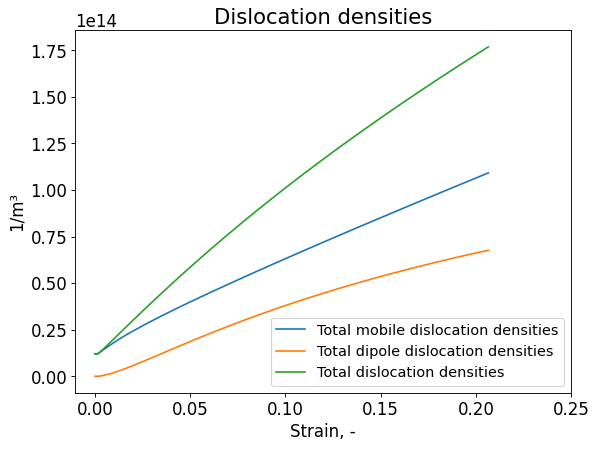

In [44]:
mobile = result.get('rho_mob_total')
dipole = result.get('rho_dip_total')
# print(mobile)

from matplotlib.pyplot import figure
#result.view(increments=0)#.get()
#print(result)
mobile = np.array([np.average(s) for s in result.get('rho_mob_total').values()])
dipole = np.array([np.average(s) for s in result.get('rho_dip_total').values()])
total = mobile + dipole
## epsilon = [np.average(e) for e in result.get('epsilon_V^-1(F_p)').values()]
epsilon = [np.average(e) for e in result.get('epsilon_V^0.0(F)_vM').values()]
#print(epsilon)

size=15
figure(figsize=(8, 6), dpi=80)
plt.plot(epsilon, mobile, label="Total mobile dislocation densities")
plt.plot(epsilon, dipole, label="Total dipole dislocation densities")
plt.plot(epsilon, total, label="Total dislocation densities")

print(total)
plt.title(f"Dislocation densities", size=size + 4)
plt.rc('xtick', labelsize=size)    
plt.rc('ytick', labelsize=size)  
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
plt.ylabel('1/m³', size=size)
plt.xlabel("Strain, -", size=size)
plt.legend(loc=4, fontsize=size - 2)